In [1]:
import networkx as nx


import random

import community as community_louvain


from IPython.display import display, HTML

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.io import mmread

from sklearn.metrics import precision_score, recall_score, f1_score

import pandas as pd

import numpy as np

sns.set_style("whitegrid")




#https://cs.stanford.edu/people/jure/pubs/sampling-kdd06.pdf

# looks like random walk based scale-down samplings are the most accurate ones

In [44]:
_graph = mmread('soc-buzznet.mtx')


graph = nx.Graph(_graph)


def show_graph_info(G):
    print("Graph Info:")
    print("Number of nodes:", G.number_of_nodes())
    print("Number of edges:", G.number_of_edges())
    print("Average degree:", sum(dict(G.degree()).values()) / G.number_of_nodes())
    print("Graph density:", nx.density(G))
    print("Is directed:", nx.is_directed(G))
    print("Is connected:", nx.is_connected(G))
    print("Is weighted:", any('weight' in G[u][v] for u, v in G.edges()))


def list_graph_attributes(G):
    attributes = set()
    for node in G.nodes():
        attributes.update(G.nodes[node].keys())
    return list(attributes)

show_graph_info(graph)
list_graph_attributes(graph)

Graph Info:
Number of nodes: 101163
Number of edges: 2763066
Average degree: 54.62601939444263
Graph density: 0.0005399855617172716
Is directed: False
Is connected: True
Is weighted: True


[]

Graph Info:
Number of nodes: 99
Number of edges: 822
Average degree: 16.606060606060606
Graph density: 0.1694495980210266
Is directed: False
Is connected: True
Is weighted: True


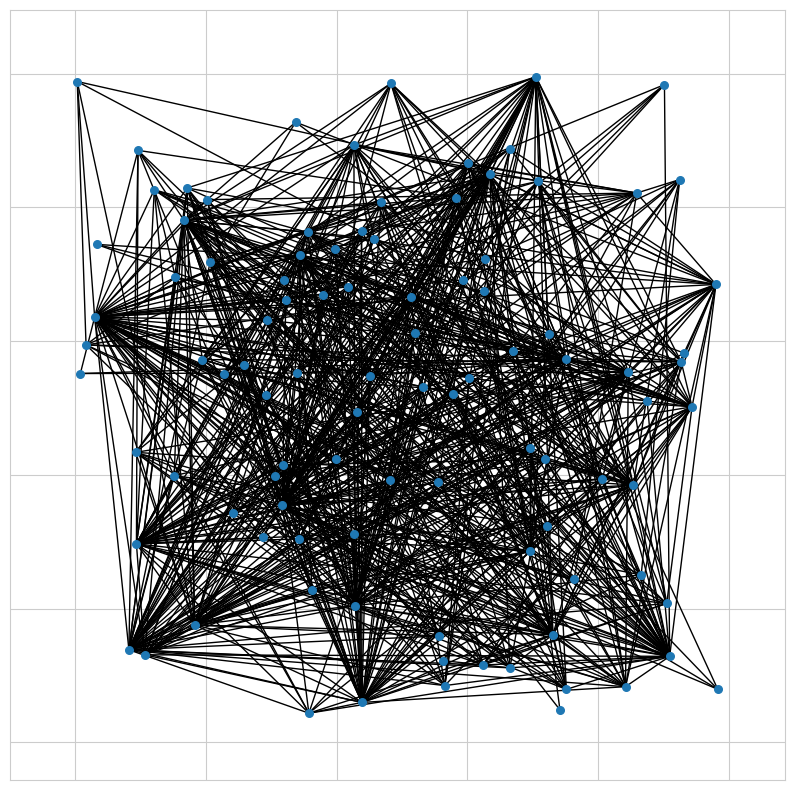

In [58]:
# def random_walk_sampling(G, num_steps=1000):
#     sampled_nodes = set()
#     sampled_edges = set()
    
#     start_node = random.choice(list(G.nodes()))
#     current_node = start_node
    
#     for _ in range(num_steps):
#         sampled_nodes.add(current_node)
        
#         neighbors = list(G.neighbors(current_node))
#         if not neighbors:
#             break
        
#         next_node = random.choice(neighbors)
#         sampled_edges.add((current_node, next_node))
#         current_node = next_node
    
#     sampled_subgraph = nx.Graph()
#     sampled_subgraph.add_nodes_from(sampled_nodes)
#     sampled_subgraph.add_edges_from(sampled_edges)
#     show_graph_info(sampled_subgraph)
    
#     return sampled_subgraph

# def sample_graph(G, sample_fraction=0.1):
#     nodes = list(G.nodes())
#     sample_size = int(len(nodes) * sample_fraction)
#     sampled_nodes = random.sample(nodes, sample_size)
#     sampled_subgraph = G.subgraph(sampled_nodes).copy()
#     show_graph_info(sampled_subgraph)
#     return sampled_subgraph

def random_walk_sampling(G, start_node, num_steps):
    sampled_nodes = {start_node}
    current_node = start_node
    for _ in range(num_steps):
        neighbors = list(G.neighbors(current_node))
        if neighbors:
            next_node = random.choice(neighbors)
            sampled_nodes.add(next_node)
            current_node = next_node
        else:
            break  # end the walk if no neighbors are available
    return G.subgraph(sampled_nodes)


def sample_graph(G) :
    start_node = random.choice(list(G.nodes()))
    num_steps = 100

    sampled_graph = random_walk_sampling(G, start_node, num_steps)

    return sampled_graph

def vizgraph(G):
    plt.figure(figsize=(10, 10), dpi=100)
    pos = nx.random_layout(G,seed=123) 
    nx.draw_networkx(G, pos, with_labels=False, node_size=30)
    # labels = nx.get_edge_attributes(G,'weight')
    # nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

    plt.show()
    

    
graph_sample = sample_graph(graph)
show_graph_info(graph_sample)
vizgraph(graph_sample)

In [57]:
clustering_coefficients = nx.clustering(graph_sample)

if isinstance(clustering_coefficients, dict):
# Convert the clustering coefficients dictionary into a DataFrame
    df = pd.DataFrame(list(clustering_coefficients.items()), columns=['Node', 'CCf']).head(50)
    display(df.sort_values(['CCf'], ascending=False))




,Node,CCf
0,56833,0.666667
43,51887,0.666667
30,86634,0.533333
46,35547,0.500000
12,66105,0.500000
5,36378,0.500000
48,30430,0.500000
37,98967,0.490909
7,33823,0.476190
38,84633,0.472222


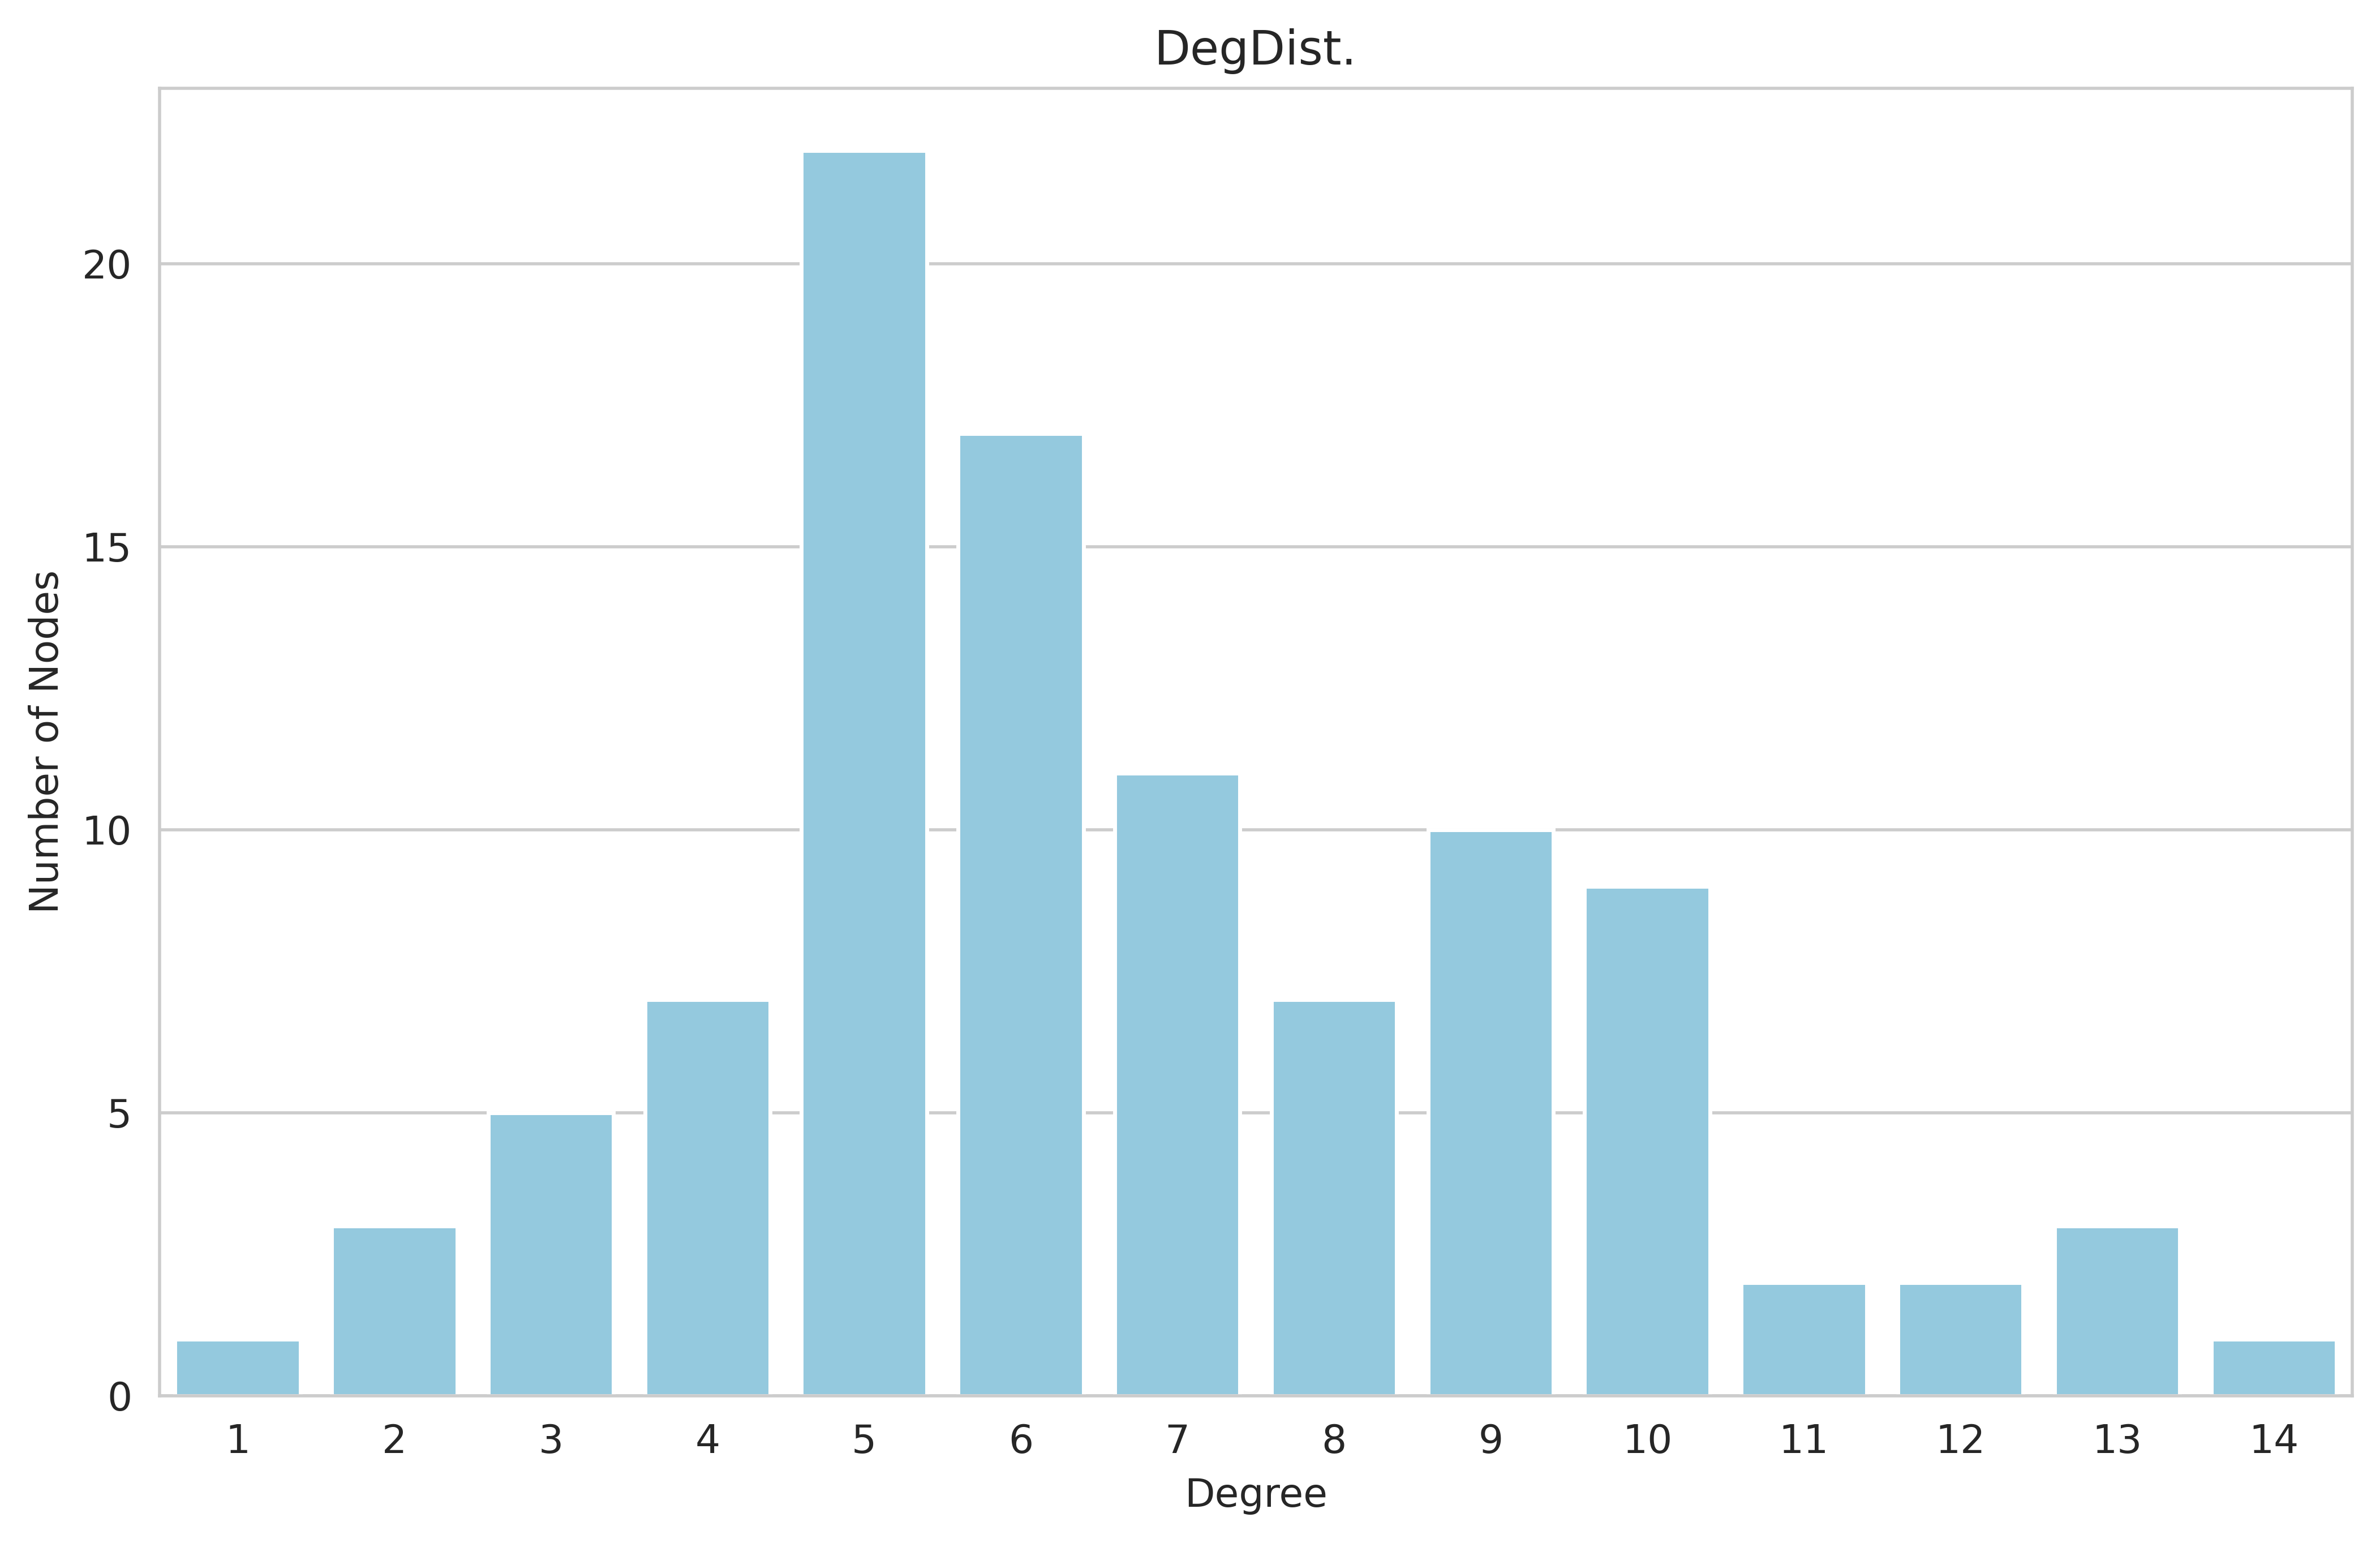

In [14]:
degrees = [graph.degree(n) for n in graph.nodes()]
degree_count = {degree: degrees.count(degree) for degree in set(degrees)}


degrees_list = list(degree_count.keys())
count_list = list(degree_count.values())

plt.figure(figsize=(10, 6), dpi=500)
sns.barplot(x=degrees_list, y=count_list, color='skyblue')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('DegDist.')
plt.show()

In [15]:
bwcenterality = nx.betweenness_centrality(graph)
if isinstance(bwcenterality, dict):
# Convert the clustering coefficients dictionary into a DataFrame
    df = pd.DataFrame(list(bwcenterality.items()), columns=['Node', 'BW centerality'])
    display(df.head(20))


,Node,BW centerality
0,0,0.010985
1,1,0.054432
2,2,0.039669
3,3,0.021329
4,4,0.012611
5,5,0.005605
6,6,0.003653
7,7,0.027666
8,8,0.011916
9,9,0.002435


In [110]:
eigenValueCentrality = nx.eigenvector_centrality(graph)
if isinstance(eigenValueCentrality, dict):
# Convert the clustering coefficients dictionary into a DataFrame
    df = pd.DataFrame(list(eigenValueCentrality.items()), columns=['Node', 'Eigenvalue centerality'])
    display(df.head(20))


,Node,Eigenvalue centerality
0,0,0.090099
1,1,0.301669
2,2,0.595621
3,3,0.369363
4,4,0.121298
5,5,0.082765
6,6,0.176716
7,7,0.163414
8,8,0.145001
9,9,0.101340


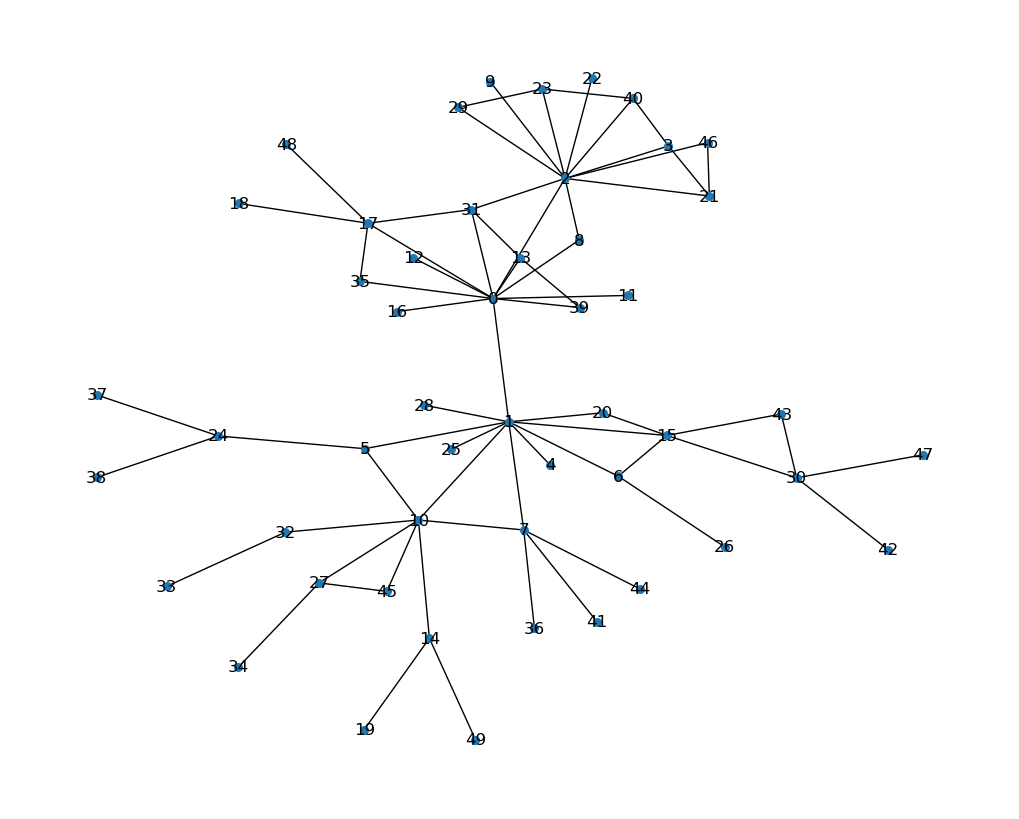

In [19]:
def random_node_pairs(graph, num_pairs):
    node_pairs = []
    nodes = list(graph.nodes())
    for _ in range(num_pairs):
        node1, node2 = random.sample(nodes, 2)
        node_pairs.append((node1, node2))
    return node_pairs



def predict_links(graph, node_pairs):
    predicted_links = []
    for node1, node2 in node_pairs:
        if not graph.has_edge(node1, node2):
            jaccard_coefficient = nx.jaccard_coefficient(graph, [(node1, node2)])
            for u, v, p in jaccard_coefficient:
                if p > 0.05:  # threshold
                    predicted_links.append((node1, node2))
    return predicted_links


def modify_graph(graph, predicted_links):
    modified_graph = graph.copy()
    modified_graph.add_edges_from(predicted_links)
    return modified_graph
    
    
num_pairs = 100
node_pairs = random_node_pairs(graph, num_pairs)

predicted_links = predict_links(graph, node_pairs)

modified_G = modify_graph(graph, predicted_links)

vizgraph(modified_G)
